# 1. Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import gc    
import scipy.cluster.hierarchy as sch
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100) 

# 2. Merging and Loading Dataset

In [3]:
path = '/kaggle/input/networkintrusiondetectionsystem' 
all_files = glob.glob(path + "/*.csv")
df_list = [] 
for filename in all_files:
    print(f"Reading: {filename}")
    try: 
        df_temp = pd.read_csv(filename, index_col=None, header=0)
    except UnicodeDecodeError: 
        df_temp = pd.read_csv(filename, index_col=None, header=0, encoding='cp1252')
    
    df_list.append(df_temp)  
df = pd.concat(df_list, axis=0, ignore_index=True) 
del df_list, df_temp
gc.collect() 
print("Final merged shape:", df.shape)
df.head()

Reading: /kaggle/input/networkintrusiondetectionsystem/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Reading: /kaggle/input/networkintrusiondetectionsystem/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Reading: /kaggle/input/networkintrusiondetectionsystem/Tuesday-WorkingHours.pcap_ISCX.csv
Reading: /kaggle/input/networkintrusiondetectionsystem/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Reading: /kaggle/input/networkintrusiondetectionsystem/Monday-WorkingHours.pcap_ISCX.csv
Reading: /kaggle/input/networkintrusiondetectionsystem/Friday-WorkingHours-Morning.pcap_ISCX.csv
Reading: /kaggle/input/networkintrusiondetectionsystem/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Reading: /kaggle/input/networkintrusiondetectionsystem/Wednesday-workingHours.pcap_ISCX.csv
Final merged shape: (2830743, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7595.104640,67.122468,15075.50000,104051.399700,948537,0,1266342,31658.550,159355.2595,996324,2,317671,7387.697674,19636.44809,104616,1,0,0,0,0,1328,1424,32.376720,34.745748,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7289.936810,64.425518,15706.58333,104861.870100,955790,1,1319353,32983.825,159247.9008,996423,1,363429,8451.837209,21337.26261,104815,1,0,0,0,0,1328,1424,31.075838,33.349680,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,12500.000000,160.00000,0.000000,160,160,0,0.000,0.0000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,32,32,6250.000000,6250.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,1,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,1,0,290,243,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,976,0,157.952381,319.121427,7182.267884,63.675308,15896.19512,106554.899000,956551,0,1303488,32587.200,160397.0499,997357,1,346851,8459.780488,23962.23892,138295,0,0,0,0,0,1328,1360,31.454068,32.221240,0,976,111.452381,241.642791,58391.23867,0,0,0,1,0,0,0,0,1,112.795181,66.536585,157.952381,1328,0,0,0,0,0,0,41,2728,42,6634,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,38961.038960,38.50000,14.849242,49,28,0,0.000,0.0000,0,0,49,49.000000,0.00000,49,49,0,0,0,0,32,64,12987.012990,25974.025970,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,2,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,2,0,243,290,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


# 3. Checking Shape, types, describe

In [4]:
df.shape
print(df.dtypes)
df.describe(include='all') 

 Destination Port                 int64
 Flow Duration                    int64
 Total Fwd Packets                int64
 Total Backward Packets           int64
Total Length of Fwd Packets       int64
 Total Length of Bwd Packets      int64
 Fwd Packet Length Max            int64
 Fwd Packet Length Min            int64
 Fwd Packet Length Mean         float64
 Fwd Packet Length Std          float64
Bwd Packet Length Max             int64
 Bwd Packet Length Min            int64
 Bwd Packet Length Mean         float64
 Bwd Packet Length Std          float64
Flow Bytes/s                    float64
 Flow Packets/s                 float64
 Flow IAT Mean                  float64
 Flow IAT Std                   float64
 Flow IAT Max                     int64
 Flow IAT Min                     int64
Fwd IAT Total                     int64
 Fwd IAT Mean                   float64
 Fwd IAT Std                    float64
 Fwd IAT Max                      int64
 Fwd IAT Min                      int64


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.829385e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2.830743e+06,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BENIGN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2273097
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,8.708495e+02,4.104958e+01,3.059493e+02,3.353257e+02,inf,inf,1.298449e+06,2.919271e+06,9.182475e+06,1.623796e+05,1.448296e+07,2.610193e+06,3.266957e+06,9.042939e+06,1.021893e+06,9.893830e+06,1.805784e+06,1.485973e+06,4.684692e+06,9.672614e+05,4.644646e-02,0.0,1.112782e-04,0.0,-2.599739e+04,-2.273275e+03,6.386535e+04,6.995192e+03,1.643450e+01,9.504024e+02,1.719444e+02,2.949756e+02,4.861548e+05,3.537976e-02,4.644646e-02,2.423392e-04,2.980705e-01,3.158443e-01,9.482316e-02,1.112782e-04,2.433990e-04,6.835004e-01,1.919837e+02,5.820194e+01,3.059493e+02,-2.599739e+04,0.0,0.0,0.0,0.0

# 4. Checking Column Names

In [5]:
print("Original Column Names:", df.columns[:79].tolist())  
duplicate_versions = [col for col in df.columns if col.endswith('.1') or col.endswith('.2')] 

if df.columns.duplicated().any():
    print("\nDuplicate Columns Found:", df.columns[df.columns.duplicated()].tolist())
else:
    print("\nNo exact duplicate column names found.")
    
if len(duplicate_versions) > 0:
    print(f"\nDuplicate columns found: {duplicate_versions}")
else:
    print("\nNo Duplicate columns found.")

Original Column Names: [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK F

# 5. Handling Column Names with Space and Duplicate

In [6]:
df.columns = df.columns.str.strip()

cols_to_drop = [col for col in df.columns if col.endswith('.1')]
if cols_to_drop:
    df.drop(columns=cols_to_drop, inplace=True)
    print(f"Dropped columns: {cols_to_drop}")
else:
    print("Nothing to drop.")
print("\nFixed Column Names:", df.columns[:79].tolist()) 

Dropped columns: ['Fwd Header Length.1']

Fixed Column Names: ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Fl

# 6. Checking Numerical and Categorical Columns

In [7]:
# Display first 5 rows
print("First 5 Rows of Data")
display(df.head())

# Check total rows and columns
print(f"\nTotal Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")

# Count Numeric vs Categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"\nNumber of Numeric Columns: {len(numeric_cols)}")
print(f"Number of Categorical Columns: {len(categorical_cols)}")

print("\nCategorical Columns")
print(categorical_cols.tolist())

First 5 Rows of Data


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7595.104640,67.122468,15075.50000,104051.399700,948537,0,1266342,31658.550,159355.2595,996324,2,317671,7387.697674,19636.44809,104616,1,0,0,0,0,1328,1424,32.376720,34.745748,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7289.936810,64.425518,15706.58333,104861.870100,955790,1,1319353,32983.825,159247.9008,996423,1,363429,8451.837209,21337.26261,104815,1,0,0,0,0,1328,1424,31.075838,33.349680,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,12500.000000,160.00000,0.000000,160,160,0,0.000,0.0000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,32,32,6250.000000,6250.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,1,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,1,0,290,243,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,976,0,157.952381,319.121427,7182.267884,63.675308,15896.19512,106554.899000,956551,0,1303488,32587.200,160397.0499,997357,1,346851,8459.780488,23962.23892,138295,0,0,0,0,0,1328,1360,31.454068,32.221240,0,976,111.452381,241.642791,58391.23867,0,0,0,1,0,0,0,0,1,112.795181,66.536585,157.952381,0,0,0,0,0,0,41,2728,42,6634,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,38961.038960,38.50000,14.849242,49,28,0,0.000,0.0000,0,0,49,49.000000,0.00000,49,49,0,0,0,0,32,64,12987.012990,25974.025970,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,2,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,2,0,243,290,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN



Total Rows: 2830743
Total Columns: 78

Number of Numeric Columns: 77
Number of Categorical Columns: 1

Categorical Columns
['Label']


# 7. Infinty Values Chceking and Handling

In [8]:
infinity_count = df.isin([np.inf, -np.inf]).sum().sum()
print(f"Total Infinity values found: {infinity_count}")  

df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(f"\nReplaced with Nan")  

Total Infinity values found: 4376

Replaced with Nan


# 8. Missing Value Checking and Handling

In [9]:
missing_values = df.isnull().sum().sum()
print(f"\nTotal Missing Values: {missing_values}") 

if missing_values > 0:
    df.dropna(inplace=True)
    print("\nDropped.")


Total Missing Values: 5734

Dropped.


# 9. Duplicate Row Checking and Handling

In [10]:
duplicates = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicates}")

if duplicates > 0: 
    df.drop_duplicates(inplace=True) 
    print("\nDropped.")

Total Duplicate Rows: 307078

Dropped.


# 10. New Shape after Cleaning

In [11]:
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")

Total Rows: 2520798
Total Columns: 78


# 11. Outlier

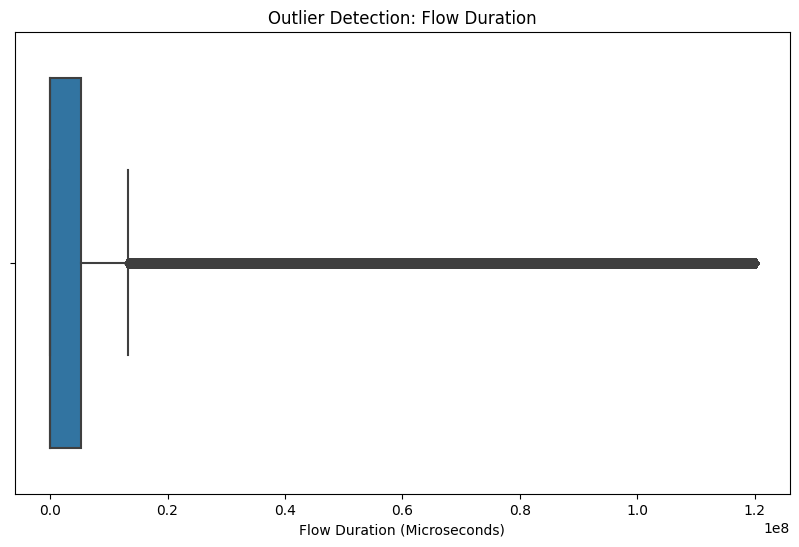


Statistical Summary of Flow Duration
count    2.520798e+06
mean     1.659161e+07
std      3.523276e+07
min     -1.300000e+01
25%      2.080000e+02
50%      5.062200e+04
75%      5.333340e+06
max      1.200000e+08
Name: Flow Duration, dtype: float64

Total Outlier Data Points found in entire dataset: 22156372


In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Flow Duration'])
plt.title("Outlier Detection: Flow Duration")
plt.xlabel("Flow Duration (Microseconds)")
plt.show() 

print("\nStatistical Summary of Flow Duration")
print(df['Flow Duration'].describe())

numeric_df = df.select_dtypes(include=['number']) 
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum() 
total_outliers = outliers.sum()
print(f"\nTotal Outlier Data Points found in entire dataset: {total_outliers}")

# 12. Identify & Drop Constant Columns (Zero Variance)

In [13]:
std_dev = df.std(numeric_only=True) 
constant_columns = std_dev[std_dev == 0].index.tolist()
print(f"Found {len(constant_columns)} constant columns:")
print(constant_columns) 
df.drop(columns=constant_columns, inplace=True)
print("\nDropped.")

Found 8 constant columns:
['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']

Dropped.


# 13. Target Variable Analysis (The Label)

In [14]:
label_counts = df['Label'].value_counts() 
print(f"Total Unique Label Types: {len(label_counts)}") 
print("\nCounts\n", label_counts)

Total Unique Label Types: 15

Counts
 Label
BENIGN                        2095057
DoS Hulk                       172846
DDoS                           128014
PortScan                        90694
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1948
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [15]:
label_mapping = {
    'BENIGN': 'NORMAL',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'DDoS': 'DDoS',
    'PortScan': 'PortScan',
    'FTP-Patator': 'BruteForce',
    'SSH-Patator': 'BruteForce',
    'Bot': 'Bot',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'DoS'   
} 
df['Label_Category'] = df['Label'].map(label_mapping) 
df['Label_Category'] = df['Label_Category'].fillna(df['Label']) 
df.loc[df['Label_Category'].str.contains('Web Attack', na=False), 'Label_Category'] = 'WebAttack'
print("\nNew Label Counts:")
print(df['Label_Category'].value_counts()) 
print(f"\nRemaining Missing Values: {df['Label_Category'].isnull().sum()}")


New Label Counts:
Label_Category
NORMAL          2095057
DoS              193756
DDoS             128014
PortScan          90694
BruteForce         9150
WebAttack          2143
Bot                1948
Infiltration         36
Name: count, dtype: int64

Remaining Missing Values: 0


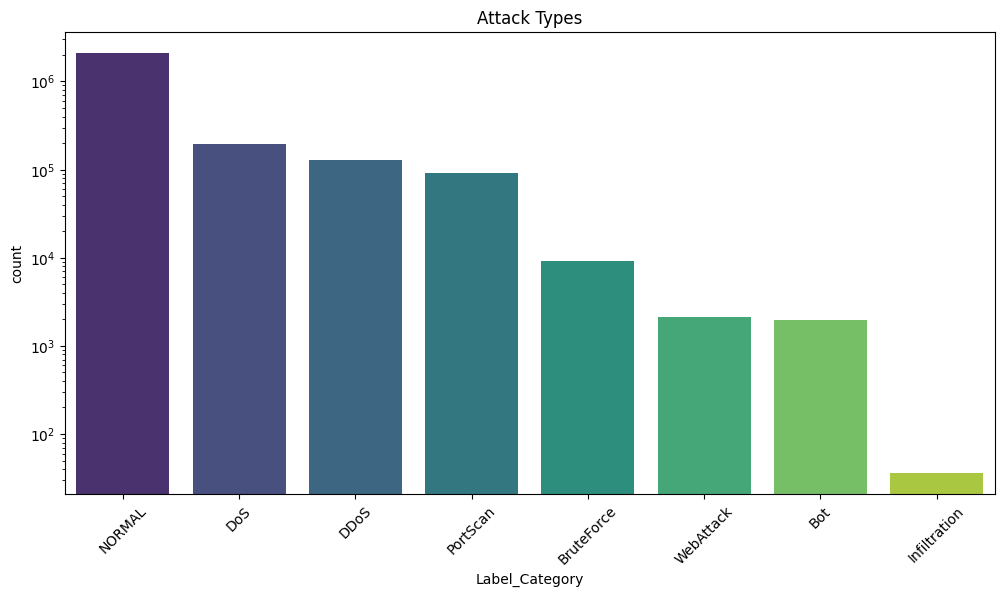

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Label_Category', palette='viridis', order=df['Label_Category'].value_counts().index)
plt.title("Attack Types")
plt.yscale('log')  
plt.xticks(rotation=45)
plt.show()

# 14. Attack Pattern

/tmp/ipykernel_47/3770145209.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_viz = df_attacks.groupby('Label_Category', group_keys=False).apply(


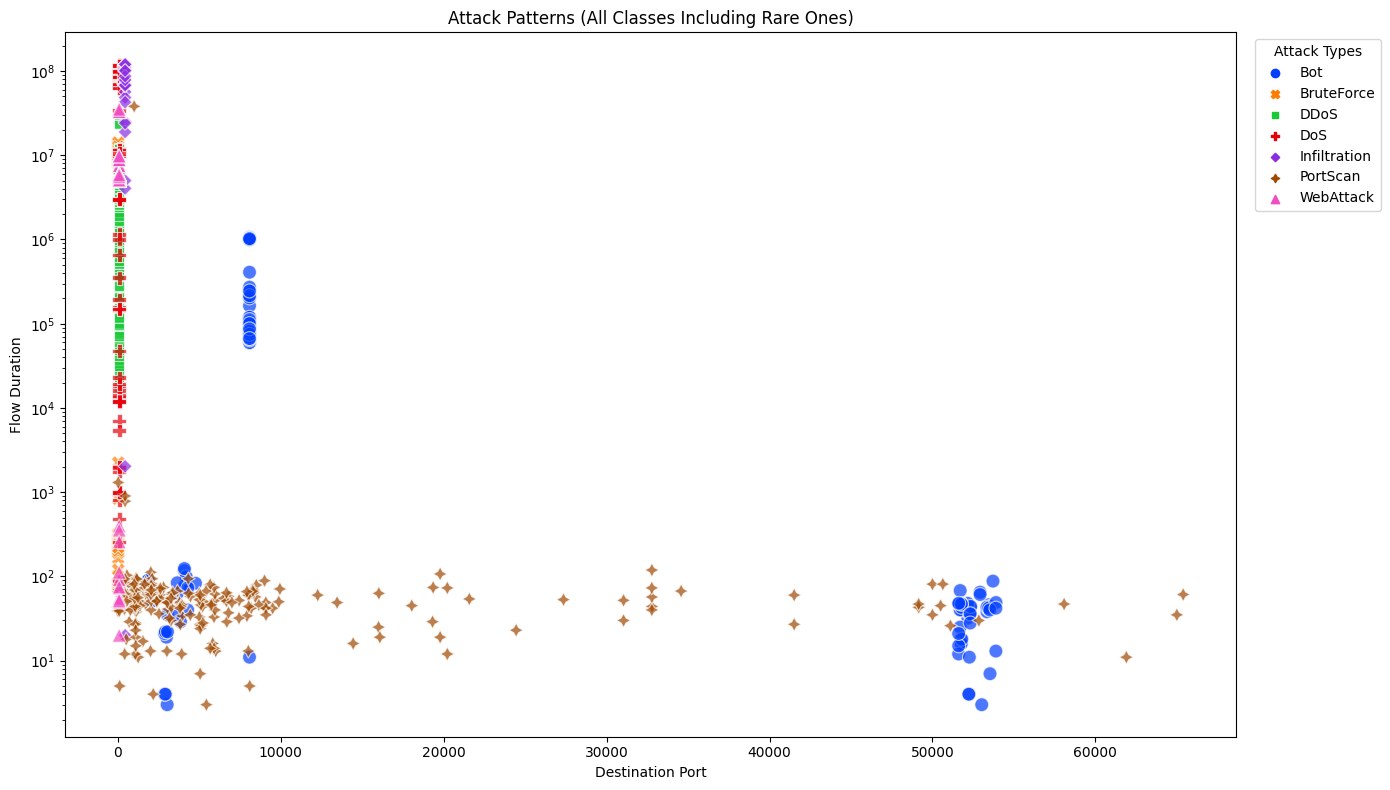

30013

In [17]:
df_attacks = df[df['Label_Category'] != 'NORMAL'] 
df_viz = df_attacks.groupby('Label_Category', group_keys=False).apply(
    lambda x: x.sample(n=min(len(x), 200), random_state=42)
) 
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_viz, 
    x='Destination Port', 
    y='Flow Duration', 
    hue='Label_Category', 
    style='Label_Category',  
    s=100,                  
    alpha=0.7, 
    palette='bright'       
)
plt.title("Attack Patterns (All Classes Including Rare Ones)")
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title="Attack Types")
plt.tight_layout()
plt.show()  
del df_attacks, df_viz
gc.collect()

/tmp/ipykernel_47/1154088884.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_viz = df_attacks.groupby('Label_Category', group_keys=False).apply(
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_47/1154088884.py:23: UserWarning: The figure layout has changed to tight
  g.fig.tight_layout(rect=[0, 0, 1, 0.95])


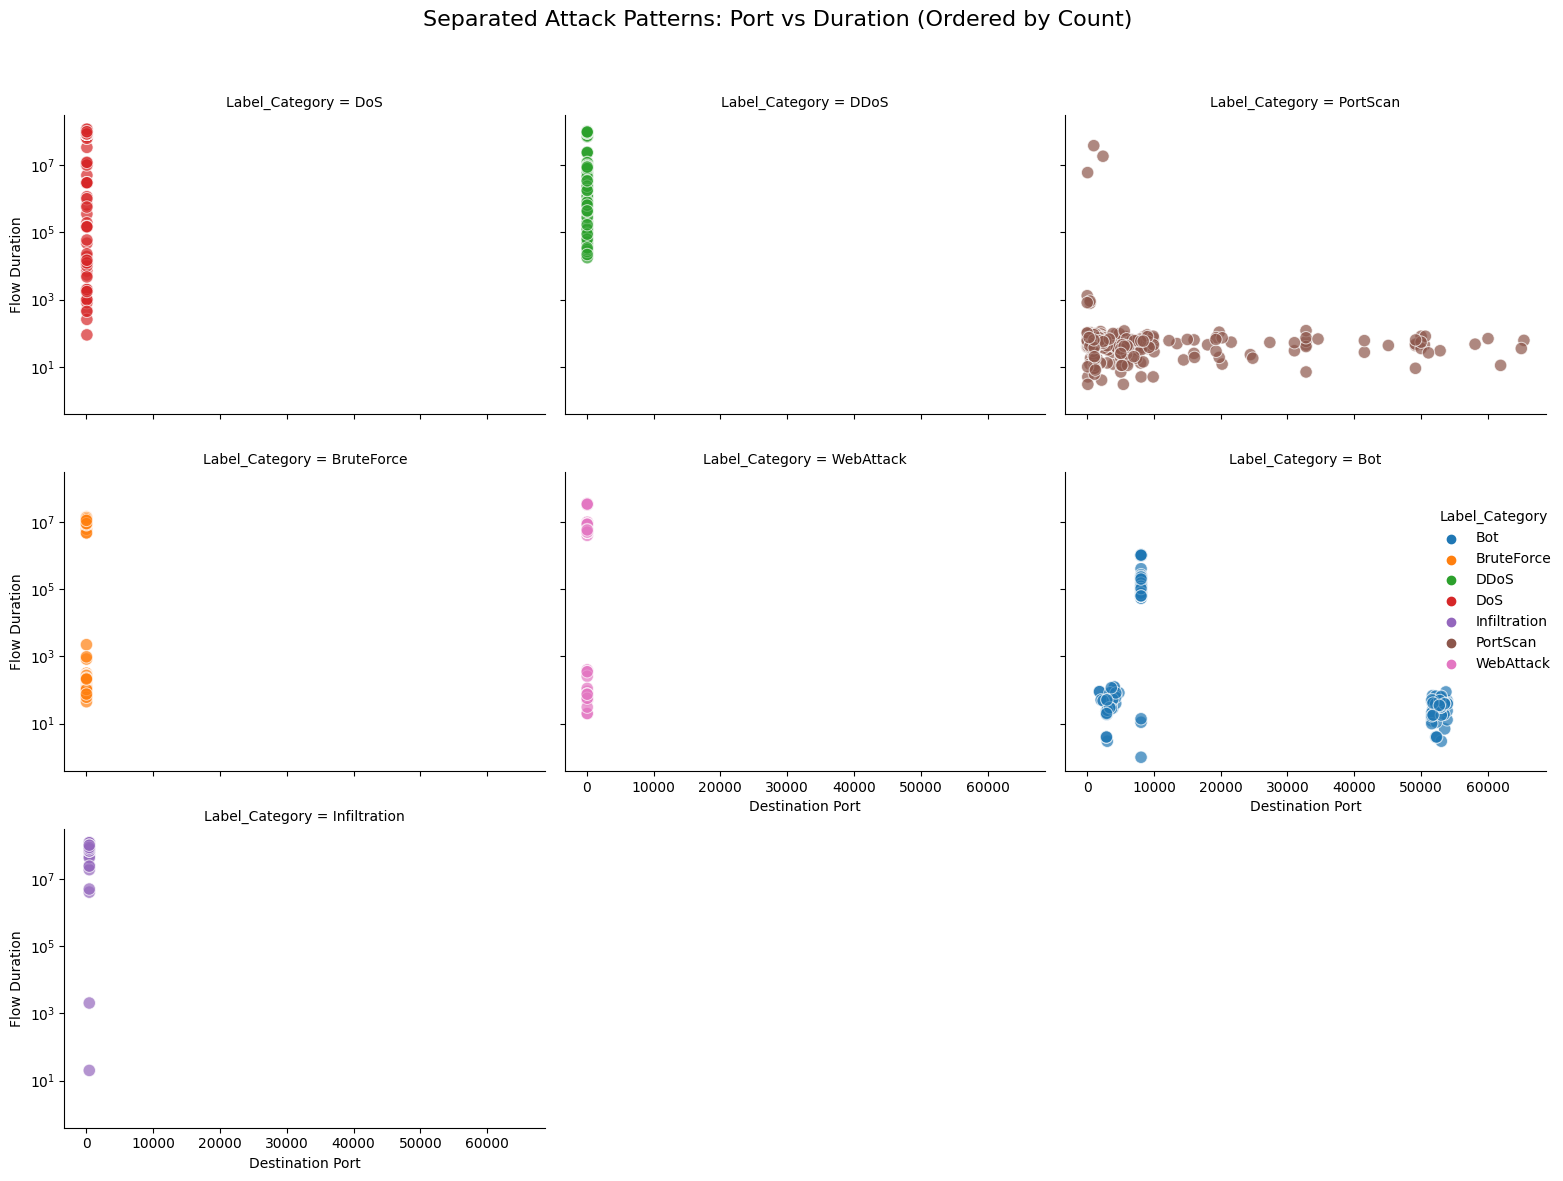

2647

In [18]:
df_attacks = df[df['Label_Category'] != 'NORMAL'] 
ordered_categories = df_attacks['Label_Category'].value_counts().index
df_viz = df_attacks.groupby('Label_Category', group_keys=False).apply(
    lambda x: x.sample(n=min(len(x), 300), random_state=42)  
)
g = sns.relplot(
    data=df_viz,
    x='Destination Port', 
    y='Flow Duration',
    col='Label_Category',   
    col_order=ordered_categories,
    col_wrap=3,             
    hue='Label_Category',
    kind='scatter',
    palette='tab10',
    height=4, 
    aspect=1.2,
    s=80,             
    alpha=0.7
)  
g.set(yscale="log") 
g.fig.suptitle('Separated Attack Patterns: Port vs Duration (Ordered by Count)', fontsize=16)
g.fig.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()  
del df_attacks, df_viz
gc.collect()

# 15. Pearson and Spearman Correlation

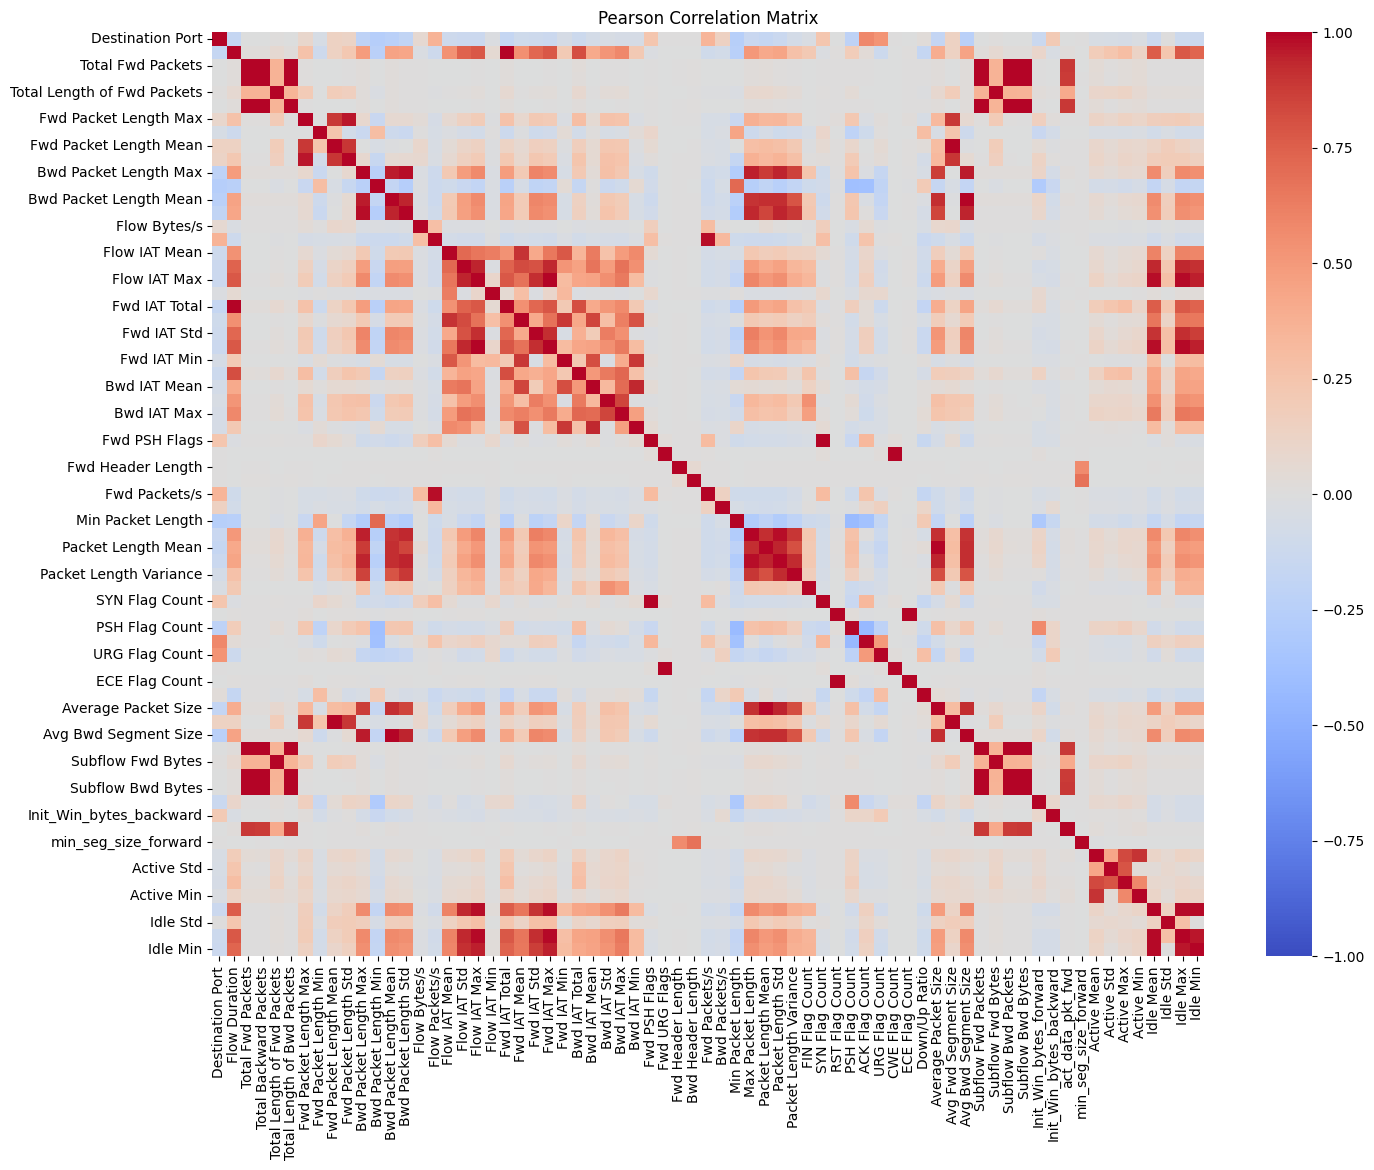

In [19]:
corr = df.corr(numeric_only=True) 
plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Pearson Correlation Matrix")
plt.show()

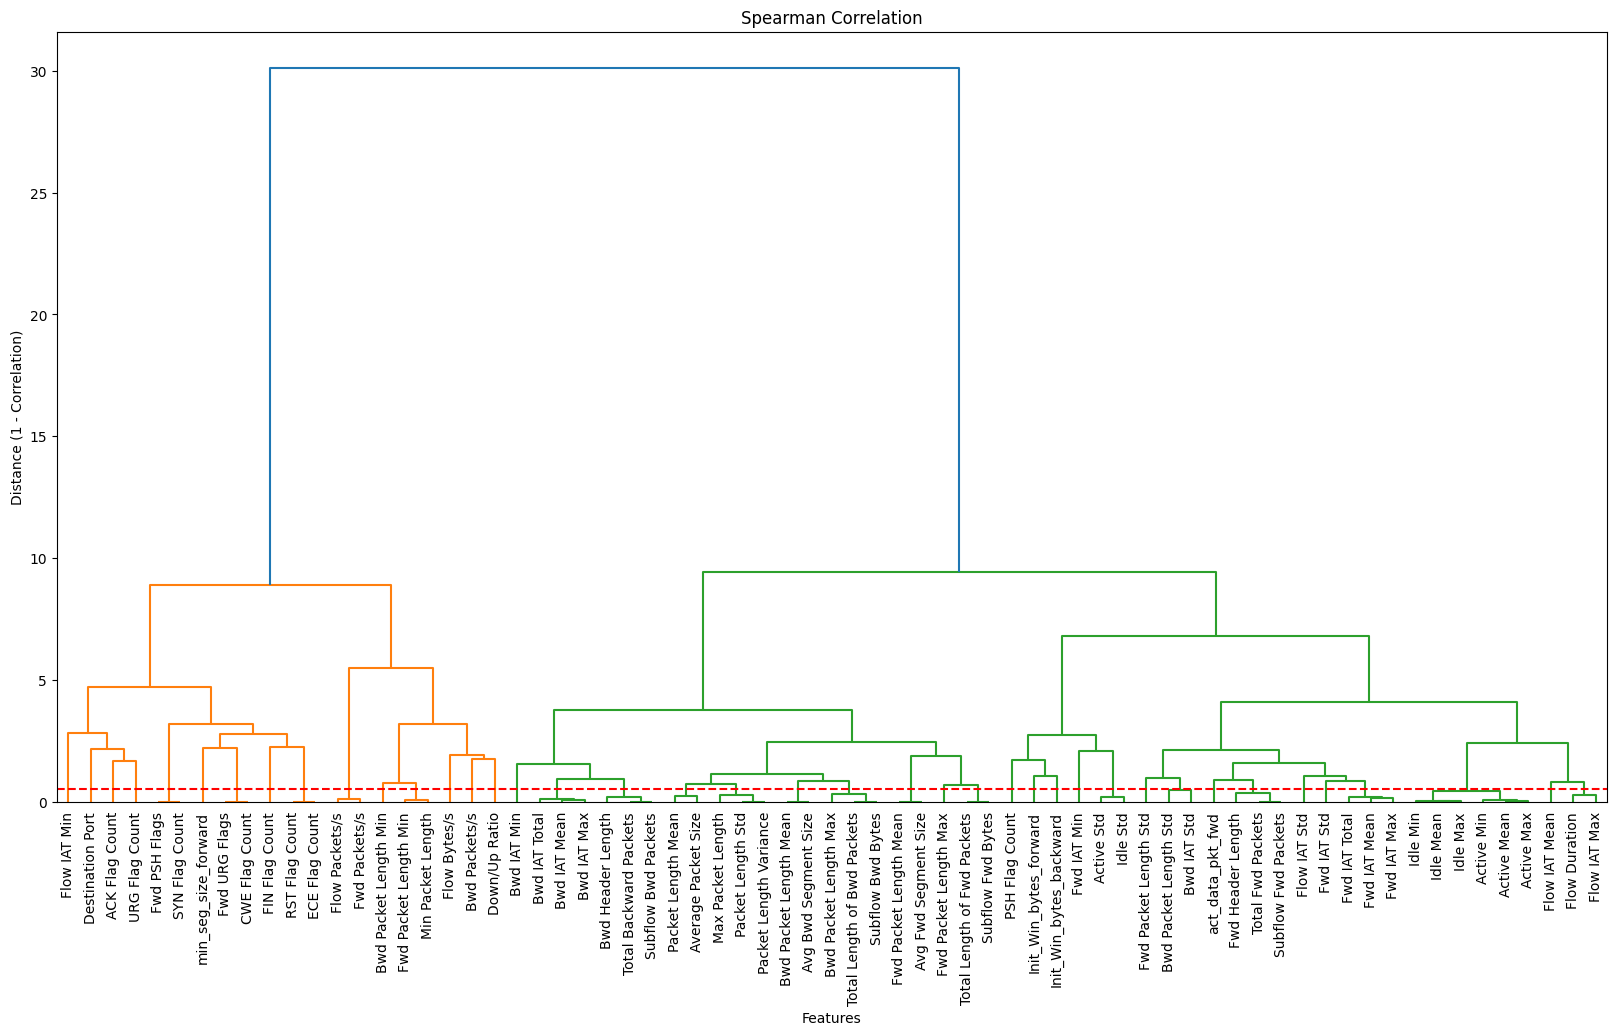

In [20]:
df_sample = df.sample(frac=0.05, random_state=42)
numeric_df = df_sample.select_dtypes(include=['number']) 
corr_matrix = numeric_df.corr(method='spearman') 
corr_matrix.fillna(0, inplace=True) 
plt.figure(figsize=(20, 10))
plt.title('Spearman Correlation')
plt.xlabel('Features')
plt.ylabel('Distance (1 - Correlation)')
linkage_matrix = sch.linkage(corr_matrix, method='ward')
dendrogram = sch.dendrogram(
    linkage_matrix,
    labels=corr_matrix.columns,
    leaf_rotation=90.,
    leaf_font_size=10.
)
plt.axhline(y=0.5, color='r', linestyle='--')  
plt.show()

# 16. Dropping Highly Correlated Cols

In [21]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.90
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print(f"Total Columns suggested to DROP (> {threshold*100}% match): {len(to_drop)}")
print("List:", to_drop)

Total Columns suggested to DROP (> 90.0% match): 36
List: ['Fwd Packet Length Max', 'Fwd Packet Length Mean', 'Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Flow IAT Mean', 'Flow IAT Max', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Max', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Max', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'SYN Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [22]:
if 'to_drop' in locals() and len(to_drop) > 0:
    print(f" -> Dropping {len(to_drop)} highly correlated columns...")
    df.drop(columns=to_drop, inplace=True, errors='ignore')
else:
    print(" -> No correlated columns found to drop (or list is empty).") 
garbage_cols = ['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Timestamp']
df.drop(columns=garbage_cols, inplace=True, errors='ignore')
print(f"Current Shape: {df.shape}")

 -> Dropping 36 highly correlated columns...
Current Shape: (2520798, 35)


# 17. Label Encoding

In [23]:
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label_Category']) 
print("\nIMPORTANT: Copy/Save this mapping to understand predictions later:")
print("-" * 40)
print(f"{'Class Name':<20} | {'Encoded Number'}")
print("-" * 40)
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
for name, num in label_map.items():
    print(f"{name:<20} | {num}")
print("-" * 40) 
df_final = df.drop(columns=['Label_Category', 'Label (original)'], errors='ignore')
print(f"\n -> Final  Clean Dataset Shape: {df_final.shape}")


IMPORTANT: Copy/Save this mapping to understand predictions later:
----------------------------------------
Class Name           | Encoded Number
----------------------------------------
Bot                  | 0
BruteForce           | 1
DDoS                 | 2
DoS                  | 3
Infiltration         | 4
NORMAL               | 5
PortScan             | 6
WebAttack            | 7
----------------------------------------

 -> Final  Clean Dataset Shape: (2520798, 34)


# 18. Clean CSV

In [24]:
file_name = 'clean_nids.csv'
print(f"Saved '{file_name}'") 
df_final.to_csv(file_name, index=False) 

Saved 'clean_nids.csv'
